# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from string import digits, ascii_uppercase, ascii_lowercase

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [4]:
# Your code here

# Set seed for reproducibility
SEED = 42

In [5]:
data = pd.read_csv('./data_all.csv')

In [6]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]

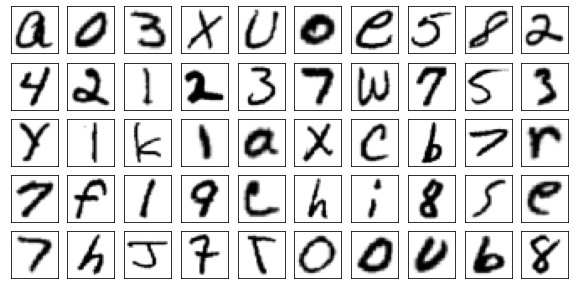

In [7]:
# create 50 subplots

fig, axes = plt.subplots(5, 10, figsize=(10, 5))

idx = 0
for i in range(5):
    for j in range(10):
        item = X.iloc[idx].values.reshape(28,28)
        axes[i][j].imshow(item, cmap='gray_r')
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        idx += 1

In [8]:
y[:50].values.reshape(5,10)

array([[36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.],
       [ 4.,  2., 47.,  2.,  3.,  7., 32.,  7.,  5.,  3.],
       [60., 18., 46., 18., 36., 59., 12., 37.,  7., 53.],
       [ 7., 15.,  1.,  9., 38., 43., 44.,  8.,  5., 40.],
       [ 7., 43., 19.,  7., 55., 24., 24., 30.,  6.,  8.]])

In [9]:
digits = list(digits)
uppercase = list(ascii_uppercase)
lowercase = list(ascii_lowercase)
characters = digits + uppercase + lowercase

In [10]:
labels = pd.Series(characters)
labels

0     0
1     1
2     2
3     3
4     4
     ..
57    v
58    w
59    x
60    y
61    z
Length: 62, dtype: object

In [11]:
digits_class = labels[labels.isin(digits)].index.values
digits_class

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
upper_class = labels[labels.isin(uppercase)].index.values
upper_class

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35])

In [13]:
lower_class = labels[labels.isin(lowercase)].index.values
lower_class

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61])

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [ ]:
# Your code here

In [14]:
mask = y.isin(upper_class)
X_upper, y_upper = X[mask], y[mask]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_upper, y_upper, test_size = 0.3, random_state=SEED
)

In [16]:
parameters = {'n_estimators':100, 'random_state':SEED}

classifier = RandomForestClassifier(**parameters)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [18]:
cmap = sns.diverging_palette(6, 255, as_cmap=True)

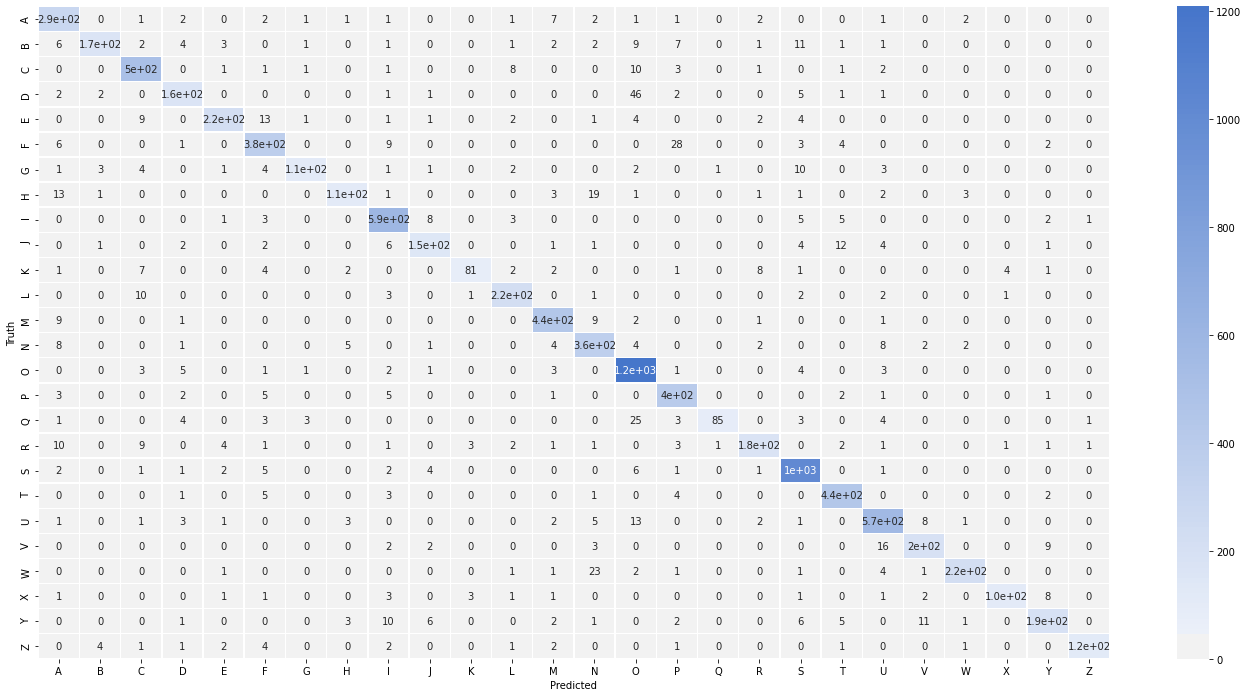

In [19]:
plt.figure(figsize=(24,12));
sns.heatmap(cm, cmap=cmap, center=0, linewidths=0.5, annot=True);
plt.xticks(np.arange(len(uppercase)) + 0.5, uppercase)
plt.yticks(np.arange(len(uppercase)) + 0.5, uppercase)
plt.xlabel('Predicted');
plt.ylabel('Truth');

* Try to do the same thing with lowercases.

In [ ]:
# Your code here

In [20]:
mask = y.isin(lower_class)
X_lower, y_lower = X[mask], y[mask]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lower, y_lower, test_size = 0.3, random_state=SEED
)

In [22]:
parameters = {'n_estimators':100, 'random_state':SEED}

classifier = RandomForestClassifier(**parameters)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)

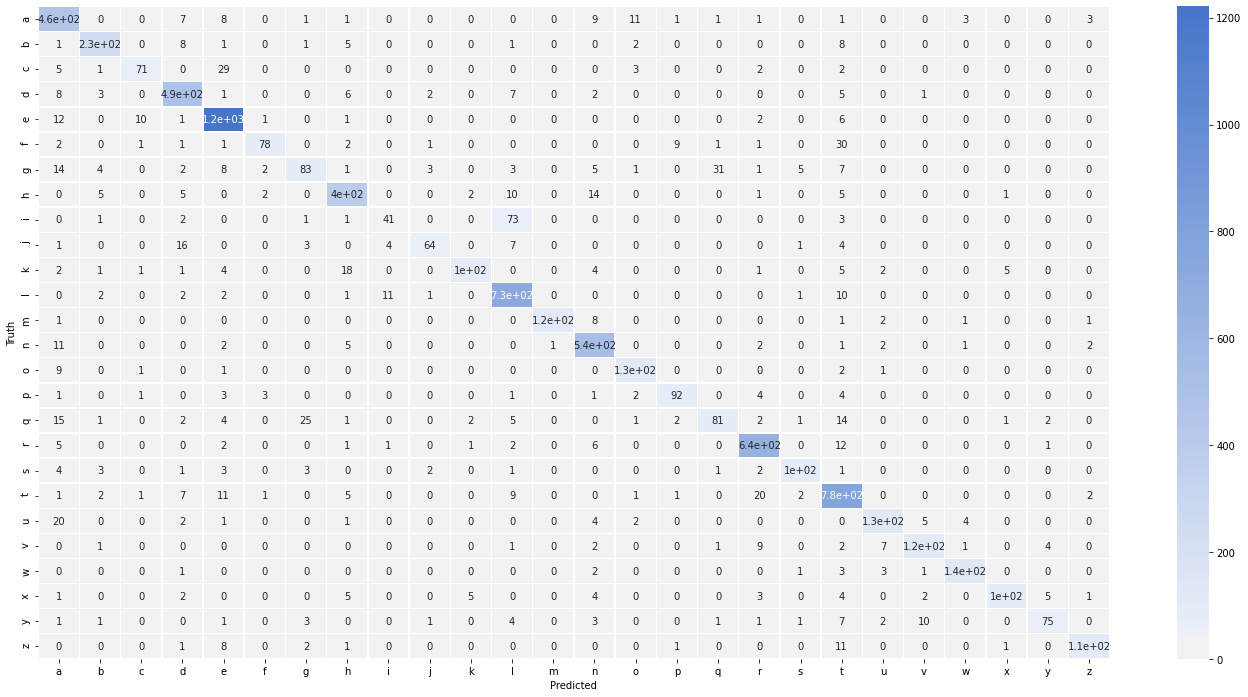

In [24]:
plt.figure(figsize=(24,12));
sns.heatmap(cm, cmap=cmap, center=0, linewidths=0.5, annot=True);
plt.xticks(np.arange(len(lowercase)) + 0.5, lowercase)
plt.yticks(np.arange(len(lowercase)) + 0.5, lowercase)
plt.xlabel('Predicted');
plt.ylabel('Truth');

* Try to do the same thing with numbers.

In [ ]:
# Your code here

In [25]:
mask = y.isin(digits_class)
X_digits, y_digits = X[mask], y[mask]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size = 0.3, random_state=SEED
)

In [27]:
parameters = {'n_estimators':100, 'random_state':SEED}

classifier = RandomForestClassifier(**parameters)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)

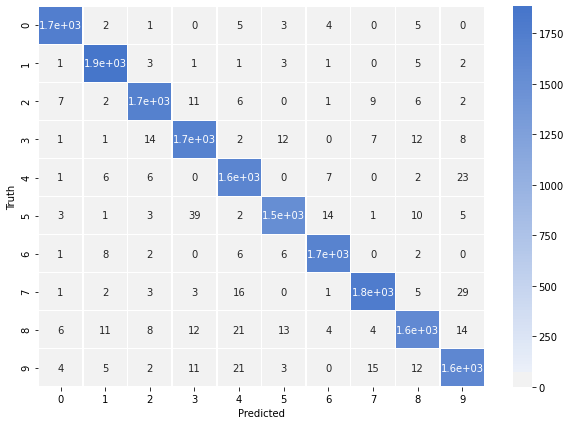

In [29]:
plt.figure(figsize=(10,7));
sns.heatmap(cm, cmap=cmap, center=0, linewidths=0.5, annot=True);
plt.xlabel('Predicted');
plt.ylabel('Truth');